#Install packages and load libraries

Install non-native packages



In [ ]:
%%capture
!pip install scikit-learn==0.22.2.post1
!pip install ipynb

Import common packages

In [ ]:
import cProfile, datetime, glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle, pstats, shutil, sys
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, auc, average_precision_score
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, train_test_split

Enable Google Colab, mount drives, and load proprietary modules...

In [ ]:
%%capture
from google.colab import drive, files
drive.mount('/content/drive', force_remount=False)
sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/Primary Research/JLMwSCBC_notebook/code/code_toPublish')   
import ppiPrediction_v2
import dataProcessing
import modelTraining
import modelEvaluating                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g5Vj9tlnRTBn0UxZjWFjXjwseZAKAev-tbqoUP6NnMZHS3aogGLs0o


#Define file paths and key variables

In [ ]:
global dateSignature
dateSignature = datetime.datetime.now().strftime("%Y-%m-%d")

#directories
workDir = '/content/drive/My Drive/Colab Notebooks/Primary Research/JLMwSCBC_notebook/'
LMprotein_complexesDir = workDir + 'proteinComplexes/Lugo-Martinez/'
GWprotein_complexesDir = workDir + 'proteinComplexes/Drew_LM_Wilkins/'

fold = 0
dir = workDir + 'dataPartitions/integratedPairs_wSCBC_5CV/integratedPairs_wSCBC_5CV_{0}/'.format(fold)
expName='integratedPairs_drewPlus+SCBC_5CV_{0}'.format(fold)

In [ ]:
trainingData, trainingLabels = dataProcessing.acquire(dir + 'trainingData.tsv', dir + 'trainingLabels.tsv', headings=False)
testData, testLabels = dataProcessing.acquire(dir + 'testData.tsv', dir + 'testLabels.tsv', headings=False)

'''
partitionsFile = workDir + 'models/models_{0}/savedPartitions.pkl'.format(expName)
partitionsSorted = pickle.load(open(partitionsFile, 'rb'))

trainedModels_properties = pd.read_csv(workDir + f'models/models_{expName}/Partition Specific '
                                          f'{expName} Training Performance_{dateSignature}.csv')
'''                                          

#rest of model eval

In [ ]:
candidatePartitions, candidatePartitions_preds, candidatePartitions_predsProbs, modelsEval_properties = \
    modelEvaluating.evalPartitions(partitionsSorted, trainedModels_properties, testData, testLabels, workDir, expName)

Evaluating models by training data partitions on testing data
____________________________________________________________
progress: 0.0
progress: 0.025303643724696356
progress: 0.05060728744939271
progress: 0.07591093117408906
progress: 0.10121457489878542
progress: 0.12651821862348178
progress: 0.15182186234817813
progress: 0.1771255060728745
progress: 0.20242914979757085
progress: 0.2277327935222672
progress: 0.25303643724696356
progress: 0.2783400809716599
progress: 0.30364372469635625
progress: 0.3289473684210526
progress: 0.354251012145749
progress: 0.37955465587044535
progress: 0.4048582995951417
progress: 0.43016194331983804
progress: 0.4554655870445344
progress: 0.4807692307692308
progress: 0.5060728744939271
progress: 0.5313765182186234
progress: 0.5566801619433198
progress: 0.5819838056680162
progress: 0.6072874493927125
progress: 0.6325910931174089
progress: 0.6578947368421052
progress: 0.6831983805668016
progress: 0.708502024291498
progress: 0.7338056680161943
progress: 0.

In [ ]:
probsPos_acc, probsPos_weighted, testLabels_adj = \
    modelEvaluating.evalTotal(candidatePartitions, candidatePartitions_predsProbs,
                              modelsEval_properties, testLabels, workDir, expName)

Streaming output truncated to the last 5000 lines.
progress: 0.8901956473950319
progress: 0.8902176302484063
progress: 0.8902396131017806
progress: 0.890261595955155
progress: 0.8902835788085294
progress: 0.8903055616619037
progress: 0.8903275445152781
progress: 0.8903495273686525
progress: 0.8903715102220269
progress: 0.8903934930754012
progress: 0.8904154759287756
progress: 0.89043745878215
progress: 0.8904594416355243
progress: 0.8904814244888987
progress: 0.8905034073422731
progress: 0.8905253901956474
progress: 0.8905473730490218
progress: 0.8905693559023962
progress: 0.8905913387557705
progress: 0.8906133216091449
progress: 0.8906353044625193
progress: 0.8906572873158936
progress: 0.890679270169268
progress: 0.8907012530226424
progress: 0.8907232358760168
progress: 0.890745218729391
progress: 0.8907672015827655
progress: 0.8907891844361399
progress: 0.8908111672895141
progress: 0.8908331501428886
progress: 0.890855132996263
progress: 0.8908771158496372
progress: 0.890899098703011

In [ ]:
precAcc, recAcc, precWeighted, recWeighted = modelEvaluating.evalSummary(probsPos_acc, probsPos_weighted, testLabels_adj, workDir, expName)

Summarizing origPairs_drewPlus+SCBC_recheck_5CV_4 analysis...
____________________________________________________________
The unit-accuracy model Pr-R AUC is 0.7635345643307045.
The combined-weighted scores model Pr-R AUC is 0.7733601361717846.
Completed summarizing origPairs_drewPlus+SCBC_recheck_5CV_4 analysis
____________________________________________________________


In [ ]:
performances4Comparision = [
                            [LMprotein_complexesDir + 'drew_BCB_features_all_model_cv_predictions_rf_400_prc.txt', 'Drew et al. 2017 5CV'],
                            [LMprotein_complexesDir + 'lugo-martinez_etal_BCB_features_all_model_cv_predictions_rf_400_prc.txt', 'Lugo-Martinez et al. 2019 5CV'],
                            [workDir + 'modelPerformance/modelsPerformance_origPairs_drewPlus+SCBC_recheck_5CV_4/unit-accuracy_results.csv', 'Best Partition Fold 4'],
                            [workDir + 'modelPerformance/modelsPerformance_origPairs_drewPlus+SCBC_recheck_5CV_4/combined-weighted_results.csv', 'Weighted Fold 4'],
                            ]

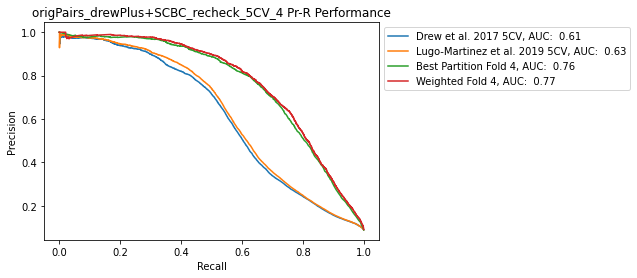

In [ ]:
#plot performance
precRecall_pairs = []
for cmpPerformance in performances4Comparision:
    precRecall_pairs.append(dataProcessing.loadResults_precRecall(cmpPerformance[0], cmpPerformance[1]))
modelEvaluating.plotAnalysis(workDir, expName, precRecall_pairs)

In [ ]:
performances4Comparision = [
                            [LMprotein_complexesDir + 'drew_BCB_features_all_model_cv_predictions_rf_400_prc.txt', 'Drew et al. 2017 5CV'],
                            [LMprotein_complexesDir + 'lugo-martinez_etal_BCB_features_all_model_cv_predictions_rf_400_prc.txt', 'Lugo-Martinez et al. 2019 5CV'],
                            [workDir + 'modelPerformance/modelsPerformance_origPairs_drewPlus+SCBC_recheck_5CV_0/unit-accuracy_results.csv', 'Best Partition Fold 0'],
                            [workDir + 'modelPerformance/modelsPerformance_origPairs_drewPlus+SCBC_recheck_5CV_0/combined-weighted_results.csv', 'Weighted Fold 0'],
                            [workDir + 'modelPerformance/modelsPerformance_origPairs_drewPlus+SCBC_recheck_5CV_1/unit-accuracy_results.csv', 'Best Partition Fold 1'],
                            [workDir + 'modelPerformance/modelsPerformance_origPairs_drewPlus+SCBC_recheck_5CV_1/combined-weighted_results.csv', 'Weighted Fold 1'],
                            [workDir + 'modelPerformance/modelsPerformance_origPairs_drewPlus+SCBC_recheck_5CV_2/unit-accuracy_results.csv', 'Best Partition Fold 2'],
                            [workDir + 'modelPerformance/modelsPerformance_origPairs_drewPlus+SCBC_recheck_5CV_2/combined-weighted_results.csv', 'Weighted Fold 2'],                                                                                    
                            [workDir + 'modelPerformance/modelsPerformance_origPairs_drewPlus+SCBC_recheck_5CV_3/unit-accuracy_results.csv', 'Best Partition Fold 3'],
                            [workDir + 'modelPerformance/modelsPerformance_origPairs_drewPlus+SCBC_recheck_5CV_3/combined-weighted_results.csv', 'Weighted Fold 3'],
                            [workDir + 'modelPerformance/modelsPerformance_origPairs_drewPlus+SCBC_recheck_5CV_4/unit-accuracy_results.csv', 'Best Partition Fold 4'],
                            [workDir + 'modelPerformance/modelsPerformance_origPairs_drewPlus+SCBC_recheck_5CV_4/combined-weighted_results.csv', 'Weighted Fold 4']                            
                            ]

FileNotFoundError: ignored

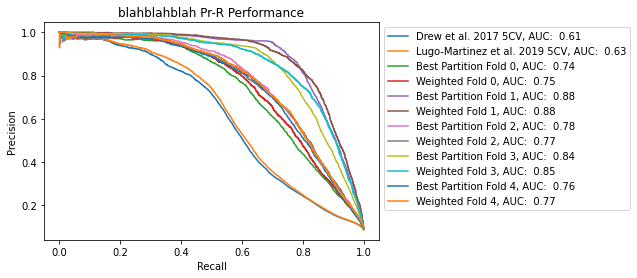

In [ ]:
#plot performance
precRecall_pairs = []
for cmpPerformance in performances4Comparision:
    precRecall_pairs.append(dataProcessing.loadResults_precRecall(cmpPerformance[0], cmpPerformance[1]))
modelEvaluating.plotAnalysis(workDir, 'blahblahblah', precRecall_pairs)

In [ ]:
modelPerformances_dirs = workDir + 'modelPerformance/modelsPerformance_origPairs_drewPlus+SCBC_recheck_5CV_*/'
modelEvaluating.plot_kCV_prr(workDir, 
                             modelPerformances_dirs, 
                             5, 'origPairs_drewPlus+SCBC_recheck')

In [ ]:
performances4Comparision = [
                            [LMprotein_complexesDir + 'drew_BCB_features_all_model_cv_predictions_rf_400_prc.txt', 'Drew et al. 2017 5CV'],
                            [LMprotein_complexesDir + 'lugo-martinez_etal_BCB_features_all_model_cv_predictions_rf_400_prc.txt', 'Lugo-Martinez et al. 2019 5CV'],
                            [workDir + 'modelPerformance/modelsPerformance_origPairs_reCheck_5CV/unit-accuracy_results.csv', 'Best Partition 5CV'],
                            [workDir + 'modelPerformance/modelsPerformance_origPairs_reCheck_5CV/combined-weighted_results.csv', 'Weighted 5CV'],
                            [workDir + 'modelPerformance/modelsPerformance_origPairs_drewPlus-5CV/unit-accuracy_results.csv', 'Best Partition w/ Added LM Features 5CV'],
                            [workDir + 'modelPerformance/modelsPerformance_origPairs_drewPlus-5CV/combined-weighted_results.csv', 'Weighted w/ Added LM Features 5CV'],                            
                            [workDir + 'modelPerformance/modelsPerformance_origPairs_drewPlus+SCBC_recheck-5CV/unit-accuracy_results.csv', 'Best Partition(Added LM, SCBC) 5CV'],
                            [workDir + 'modelPerformance/modelsPerformance_origPairs_drewPlus+SCBC_recheck-5CV/combined-weighted_results.csv', 'Weighted (Added LM, SCBC) 5CV']
                            ]

FileNotFoundError: ignored

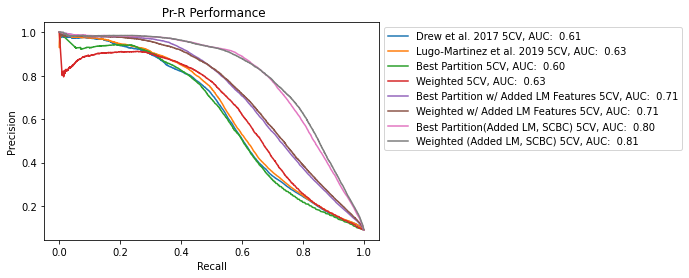

In [ ]:
#plot performance
precRecall_pairs = []
for cmpPerformance in performances4Comparision:
    precRecall_pairs.append(dataProcessing.loadResults_precRecall(cmpPerformance[0], cmpPerformance[1]))
modelEvaluating.plotAnalysis(workDir, '', precRecall_pairs)